<a href="https://colab.research.google.com/github/sejal-godbole/NLP/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Define Dataset

In [1]:
documents = [
    "I love machine learning",
    "Machine learning is amazing",
    "I love artificial intelligence",
    "Artificial intelligence and machine learning"
]

Bag of Words - Count the Occurence of Each Word

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bow_counts = count_vectorizer.fit_transform(documents)

print("Vocabulary:", count_vectorizer.get_feature_names_out())
print("Bag of Words (Counts):\n", bow_counts.toarray())

Vocabulary: ['amazing' 'and' 'artificial' 'intelligence' 'is' 'learning' 'love'
 'machine']
Bag of Words (Counts):
 [[0 0 0 0 0 1 1 1]
 [1 0 0 0 1 1 0 1]
 [0 0 1 1 0 0 1 0]
 [0 1 1 1 0 1 0 1]]


Normalize Bag of Word

In [4]:
import numpy as np

bow_array = bow_counts.toarray()
normalized_bow = bow_array / bow_array.sum(axis=1, keepdims=True)

print(normalized_bow.tolist())

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.25, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.25], [0.0, 0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0], [0.0, 0.2, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2]]


TF-IDF (Term Frequency – Inverse Document Frequency)

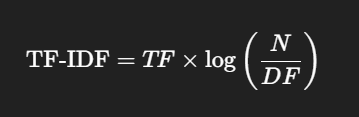

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

print("### TF-IDF Vocabulary")
print(list(vocab))

print("\n### TF-IDF Matrix (row-wise)")
for i, row in enumerate(tfidf_array):
    print(f"Document {i+1}: {row.tolist()}")

### TF-IDF Vocabulary
['amazing', 'and', 'artificial', 'intelligence', 'is', 'learning', 'love', 'machine']

### TF-IDF Matrix (row-wise)
Document 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.5325695234255544, 0.6578293132998527, 0.5325695234255544]
Document 2: [0.5960389368177127, 0.0, 0.0, 0.0, 0.5960389368177127, 0.38044393252779135, 0.0, 0.38044393252779135]
Document 3: [0.0, 0.0, 0.5773502691896257, 0.5773502691896257, 0.0, 0.0, 0.5773502691896257, 0.0]
Document 4: [0.0, 0.5718482940425992, 0.4508517633446265, 0.4508517633446265, 0.0, 0.3650033586000619, 0.0, 0.3650033586000619]


Word2Vec Embeddings

In [7]:
tokenized_docs = [doc.lower().split() for doc in documents]

In [9]:
!pip install gensim
from gensim.models import Word2Vec

word2vec_model = Word2Vec(
    sentences=tokenized_docs,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.0 MB/s eta 0:00:00


In [10]:
vector = word2vec_model.wv['machine']
print("Word2Vec embedding for 'machine':\n", vector)
print("Vector length:", len(vector))

Word2Vec embedding for 'machine':
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7104042e-03
 -8.5343346e-03  3.2071066e-03 -4.6379971e-03 -5.0

Get Similar Word

In [11]:
word2vec_model.wv.most_similar('learning')

[('amazing', 0.09291722625494003),
 ('is', 0.027057476341724396),
 ('and', 0.016134677454829216),
 ('machine', -0.01083916611969471),
 ('love', -0.027750369161367416),
 ('intelligence', -0.05234673246741295),
 ('i', -0.059876296669244766),
 ('artificial', -0.111670583486557)]